Disease
0    32993
1      998
Name: count, dtype: int64
[[6591    9]
 [   4  195]]
              precision    recall  f1-score   support

Pas de crise       1.00      1.00      1.00      6600
      Asthme       0.96      0.98      0.97       199

    accuracy                           1.00      6799
   macro avg       0.98      0.99      0.98      6799
weighted avg       1.00      1.00      1.00      6799



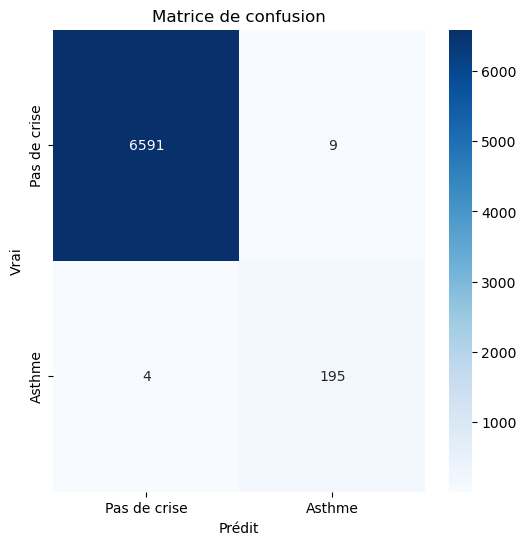

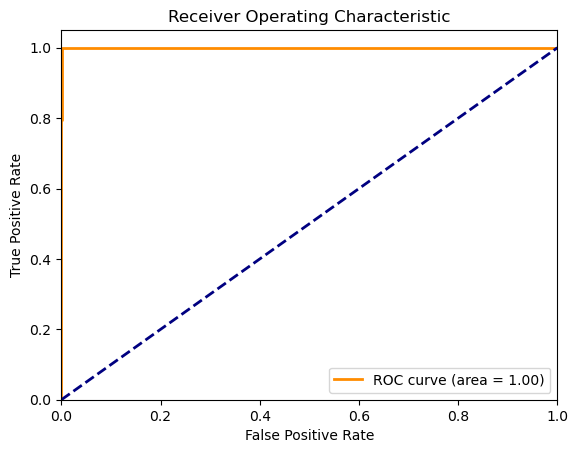

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
fichier = pd.read_csv("C:\\Users\\PC\\Downloads\\traitement_final.csv")

# Séparation du dataset
X = fichier.drop('Disease', axis=1)
y = fichier['Disease']
print(y.value_counts())

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Création du modèle de régression logistique
logreg = LogisticRegression(solver='saga', max_iter=10000, random_state=16)

# Entraînement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Affichage de la matrice de confusion
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# Rapport de classification
target_names = ['Pas de crise', 'Asthme']
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualisation de la matrice de confusion
plt.figure(figsize=(6,6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matrice de confusion')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
